# EfficientB0
EfficientNet is  highly efficient in terms of both computational resources and model size while achieving state-of-the-art performance on various computer vision tasks. The "B0" in EfficientNet B0 refers to the smallest and baseline version of the architecture.EfficientNet B0 takes color images as input.EfficientNet B0 consists of multiple stacked convolutional blocks.Each block includes a series of operations, including convolutional layers, batch normalization, and activation functions.These blocks are stacked in a pyramid fashion, where the number of blocks and their complexity increases as you move deeper into the network.EfficientNet is the depthwise separable convolution.It separates the standard convolution into two parts: depthwise convolution and pointwise convolution.Depthwise convolution applies a separate convolutional filter to each input channel.Pointwise convolution performs a 1x1 convolution to combine the output channels from the depthwise convolution.
This reduces the number of parameters and computations, making the network more efficient.After the convolutional blocks, EfficientNet typically uses global average pooling to reduce the spatial dimensions of the feature maps to a 1x1 size.

Importing Necessary Libraries

In [6]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2

In [7]:
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from zipfile import ZipFile

<ipython-input-7-988173373be1>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


Upload Kaagle API key to download Dataset

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 72 bytes


In [2]:
!mkdir -p /root/.kaggle
!mv kaggle.json /root/.kaggle/


In [3]:
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection


 60% 9.00M/15.1M [00:00<00:00, 49.0MB/s]
100% 15.1M/15.1M [00:00<00:00, 73.7MB/s]


In [9]:
from zipfile import ZipFile
file_name = "/content/brain-mri-images-for-brain-tumor-detection.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [10]:
os.chdir('/content/brain_tumor_dataset/yes')
X = []
y = []
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append((i[0:1]))
      print(i[0:1])
os.chdir('/content/brain_tumor_dataset/no')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      X.append(img)
for i in range(1,99):
    y.append('N')
print(y)

  0%|          | 0/155 [00:00<?, ?it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


  0%|          | 0/98 [00:00<?, ?it/s]

['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',

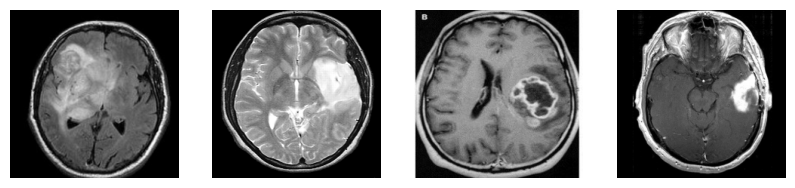

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)


In [ ]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)

In [ ]:
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (169, 224, 224, 3)
X_test Shape:  (84, 224, 224, 3)
y_train Shape:  (169, 2)
y_test Shape:  (84, 2)


import EfficientBo model

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
img_rows, img_cols = 224, 224

efficientnet = EfficientNetB0(weights='imagenet',
                  include_top=False,
                  input_shape=(img_rows, img_cols, 3))


In [ ]:
for layer in efficientnet.layers:
    layer.trainable = False


In [ ]:
num_classes = 2  # Replace 2 with the actual number of classes in your problem

# Import necessary layers
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

for (i, layer) in enumerate(efficientnet.layers):
    print(str(i) + " " + layer.__class__.__name__, layer.trainable)

# Define your top model function outside the loop
def create_top_model(bottom_model, num_classes):
    """Creates the top or head of the model that will be placed on top of the bottom layers"""

    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dense(num_classes, activation='softmax')(top_model)
    return top_model

# Call the function to create the top model
top_model = create_top_model(efficientnet, num_classes)


0 InputLayer False
1 Rescaling False
2 Normalization False
3 Rescaling False
4 ZeroPadding2D False
5 Conv2D False
6 BatchNormalization False
7 Activation False
8 DepthwiseConv2D False
9 BatchNormalization False
10 Activation False
11 GlobalAveragePooling2D False
12 Reshape False
13 Conv2D False
14 Conv2D False
15 Multiply False
16 Conv2D False
17 BatchNormalization False
18 Conv2D False
19 BatchNormalization False
20 Activation False
21 ZeroPadding2D False
22 DepthwiseConv2D False
23 BatchNormalization False
24 Activation False
25 GlobalAveragePooling2D False
26 Reshape False
27 Conv2D False
28 Conv2D False
29 Multiply False
30 Conv2D False
31 BatchNormalization False
32 Conv2D False
33 BatchNormalization False
34 Activation False
35 DepthwiseConv2D False
36 BatchNormalization False
37 Activation False
38 GlobalAveragePooling2D False
39 Reshape False
40 Conv2D False
41 Conv2D False
42 Multiply False
43 Conv2D False
44 BatchNormalization False
45 Dropout False
46 Add False
47 Conv2D Fal

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

from keras.models import Model


num_classes = 2

FC_Head = create_top_model(efficientnet, num_classes)

model = Model(inputs = efficientnet.input, outputs = FC_Head)

print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_2 (Rescaling)     (None, 224, 224, 3)          0         ['input_3[0][0]']             
                                                                                                  
 normalization_1 (Normaliza  (None, 224, 224, 3)          7         ['rescaling_2[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_3 (Rescaling)     (None, 224, 224, 3)          0         ['normalization_1[0][0]'

Training

In [ ]:
from tensorflow.keras.models import Model
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model.fit(X_train,y_train,
                    epochs=20,
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    initial_epoch=0)

Epoch 1/20
6/6 [==============================] - 31s 4s/step - loss: 0.1723 - accuracy: 0.9527 - val_loss: 0.6062 - val_accuracy: 0.8810
Epoch 2/20
6/6 [==============================] - 23s 4s/step - loss: 0.2151 - accuracy: 0.9349 - val_loss: 0.4941 - val_accuracy: 0.8810
Epoch 3/20
6/6 [==============================] - 24s 4s/step - loss: 0.0806 - accuracy: 0.9704 - val_loss: 0.3663 - val_accuracy: 0.8690
Epoch 4/20
6/6 [==============================] - 24s 4s/step - loss: 0.0570 - accuracy: 0.9763 - val_loss: 0.7143 - val_accuracy: 0.9048
Epoch 5/20
6/6 [==============================] - 25s 4s/step - loss: 0.0143 - accuracy: 0.9882 - val_loss: 0.7381 - val_accuracy: 0.8810
Epoch 6/20
6/6 [==============================] - 25s 5s/step - loss: 0.0205 - accuracy: 0.9941 - val_loss: 0.8994 - val_accuracy: 0.8810
Epoch 7/20
6/6 [==============================] - 24s 4s/step - loss: 0.0768 - accuracy: 0.9704 - val_loss: 0.7719 - val_accuracy: 0.8571
Epoch 8/20
6/6 [==================

Plotting the Graph

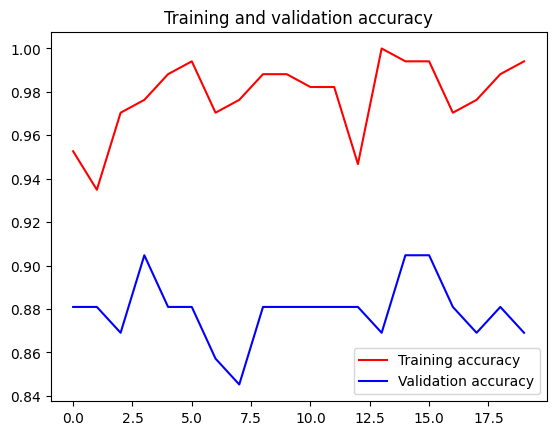

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

Testing

1/1 [==============================] - 2s 2s/step


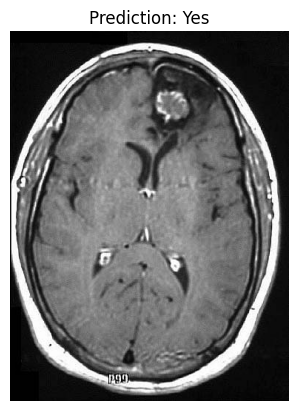

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Load and preprocess the test image
test_image_path = "/content/brain_tumor_dataset/yes/Y12.jpg"  # Replace with the path to your test image
test_image = cv2.imread(test_image_path)
test_image = cv2.resize(test_image, (224, 224))
test_image = np.expand_dims(test_image, axis=0)  # Add a batch dimension
test_image = test_image / 255.0  # Normalize pixel values (assuming VGG16 preprocessing)

# Make predictions
predictions = model.predict(test_image)

# Interpret the prediction result
if predictions[0][0] > predictions[0][1]:
    prediction_label = "Yes"
else:
    prediction_label = "No"

# Display the test image along with the predicted label
plt.imshow(cv2.cvtColor(cv2.imread(test_image_path), cv2.COLOR_BGR2RGB))
plt.title(f"Prediction: {prediction_label}")
plt.axis('off')
plt.show()